In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
dataset = pd.read_csv('soilmoisture1.csv')

In [3]:
dataset

,DATE-TIME,HP Temp (0-5cm),Temp 1cm,Temp 2.5cm,Temp 5cm,SM (0-5cm)
0,1-6-2018 0:00,5.1,6.98,7.45,8.19,16.92
1,1-6-2018 0:20,4.7,6.69,7.18,7.96,16.82
2,1-6-2018 0:40,4.4,6.43,6.95,7.74,16.49
3,1-6-2018 1:00,4.0,6.10,6.61,7.47,16.75
4,1-6-2018 1:20,3.9,6.01,6.51,7.39,16.76
...,...,...,...,...,...,...
6619,31/8/2018 22:20,9.9,10.81,11.04,11.38,9.44
6620,31/8/2018 22:40,9.5,10.38,10.68,11.06,9.44
6621,31/8/2018 23:00,9.2,10.21,10.52,10.92,9.44
6622,31/8/2018 23:20,9.1,10.07,10.36,10.76,9.19


In [4]:
dataset

,DATE-TIME,HP Temp (0-5cm),Temp 1cm,Temp 2.5cm,Temp 5cm,SM (0-5cm)
0,1-6-2018 0:00,5.1,6.98,7.45,8.19,16.92
1,1-6-2018 0:20,4.7,6.69,7.18,7.96,16.82
2,1-6-2018 0:40,4.4,6.43,6.95,7.74,16.49
3,1-6-2018 1:00,4.0,6.10,6.61,7.47,16.75
4,1-6-2018 1:20,3.9,6.01,6.51,7.39,16.76
...,...,...,...,...,...,...
6619,31/8/2018 22:20,9.9,10.81,11.04,11.38,9.44
6620,31/8/2018 22:40,9.5,10.38,10.68,11.06,9.44
6621,31/8/2018 23:00,9.2,10.21,10.52,10.92,9.44
6622,31/8/2018 23:20,9.1,10.07,10.36,10.76,9.19


In [5]:
dataset['DATE-TIME'] = dataset['DATE-TIME'].str.replace('/','-')

In [6]:
dataset

,DATE-TIME,HP Temp (0-5cm),Temp 1cm,Temp 2.5cm,Temp 5cm,SM (0-5cm)
0,1-6-2018 0:00,5.1,6.98,7.45,8.19,16.92
1,1-6-2018 0:20,4.7,6.69,7.18,7.96,16.82
2,1-6-2018 0:40,4.4,6.43,6.95,7.74,16.49
3,1-6-2018 1:00,4.0,6.10,6.61,7.47,16.75
4,1-6-2018 1:20,3.9,6.01,6.51,7.39,16.76
...,...,...,...,...,...,...
6619,31-8-2018 22:20,9.9,10.81,11.04,11.38,9.44
6620,31-8-2018 22:40,9.5,10.38,10.68,11.06,9.44
6621,31-8-2018 23:00,9.2,10.21,10.52,10.92,9.44
6622,31-8-2018 23:20,9.1,10.07,10.36,10.76,9.19


In [7]:
new = dataset["DATE-TIME"].str.split("-", n = 2, expand = True)

In [8]:
new

,0,1,2
0,1,6,2018 0:00
1,1,6,2018 0:20
2,1,6,2018 0:40
3,1,6,2018 1:00
4,1,6,2018 1:20
...,...,...,...
6619,31,8,2018 22:20
6620,31,8,2018 22:40
6621,31,8,2018 23:00
6622,31,8,2018 23:20


In [9]:
YearTime = new.iloc[:,2].str.split(" ", n = 1, expand = True)

In [10]:
YearTime

,0,1
0,2018,0:00
1,2018,0:20
2,2018,0:40
3,2018,1:00
4,2018,1:20
...,...,...
6619,2018,22:20
6620,2018,22:40
6621,2018,23:00
6622,2018,23:20


In [11]:
Time = YearTime.iloc[: , 1].str.split(":", n = 1, expand = True)

In [12]:
Time

,0,1
0,0,00
1,0,20
2,0,40
3,1,00
4,1,20
...,...,...
6619,22,20
6620,22,40
6621,23,00
6622,23,20


In [13]:
dataset['hour'] = Time[0]
dataset['minute'] = Time[1]
dataset['month'] = new[1]

In [14]:
dataset

,DATE-TIME,HP Temp (0-5cm),Temp 1cm,Temp 2.5cm,Temp 5cm,SM (0-5cm),hour,minute,month
0,1-6-2018 0:00,5.1,6.98,7.45,8.19,16.92,0,00,6
1,1-6-2018 0:20,4.7,6.69,7.18,7.96,16.82,0,20,6
2,1-6-2018 0:40,4.4,6.43,6.95,7.74,16.49,0,40,6
3,1-6-2018 1:00,4.0,6.10,6.61,7.47,16.75,1,00,6
4,1-6-2018 1:20,3.9,6.01,6.51,7.39,16.76,1,20,6
...,...,...,...,...,...,...,...,...,...
6619,31-8-2018 22:20,9.9,10.81,11.04,11.38,9.44,22,20,8
6620,31-8-2018 22:40,9.5,10.38,10.68,11.06,9.44,22,40,8
6621,31-8-2018 23:00,9.2,10.21,10.52,10.92,9.44,23,00,8
6622,31-8-2018 23:20,9.1,10.07,10.36,10.76,9.19,23,20,8


In [15]:
dataset.info

<bound method DataFrame.info of             DATE-TIME  HP Temp (0-5cm)   Temp 1cm   Temp 2.5cm   Temp 5cm   \
0       1-6-2018 0:00               5.1       6.98         7.45       8.19   
1       1-6-2018 0:20               4.7       6.69         7.18       7.96   
2       1-6-2018 0:40               4.4       6.43         6.95       7.74   
3       1-6-2018 1:00               4.0       6.10         6.61       7.47   
4       1-6-2018 1:20               3.9       6.01         6.51       7.39   
...               ...               ...        ...          ...        ...   
6619  31-8-2018 22:20               9.9      10.81        11.04      11.38   
6620  31-8-2018 22:40               9.5      10.38        10.68      11.06   
6621  31-8-2018 23:00               9.2      10.21        10.52      10.92   
6622  31-8-2018 23:20               9.1      10.07        10.36      10.76   
6623  31-8-2018 23:40               9.1       9.90        10.20      10.60   

      SM (0-5cm) hour minute mo

In [16]:
dataset.drop(labels=['DATE-TIME'], axis = 1,inplace=True)

In [17]:
dataset

,HP Temp (0-5cm),Temp 1cm,Temp 2.5cm,Temp 5cm,SM (0-5cm),hour,minute,month
0,5.1,6.98,7.45,8.19,16.92,0,00,6
1,4.7,6.69,7.18,7.96,16.82,0,20,6
2,4.4,6.43,6.95,7.74,16.49,0,40,6
3,4.0,6.10,6.61,7.47,16.75,1,00,6
4,3.9,6.01,6.51,7.39,16.76,1,20,6
...,...,...,...,...,...,...,...,...
6619,9.9,10.81,11.04,11.38,9.44,22,20,8
6620,9.5,10.38,10.68,11.06,9.44,22,40,8
6621,9.2,10.21,10.52,10.92,9.44,23,00,8
6622,9.1,10.07,10.36,10.76,9.19,23,20,8


In [18]:
 dataset = dataset.set_axis(['HPTemp', 'Temp1cm', 'Temp2.5cm', 'Temp5cm', 'SM', 'hr', 'min', 'month'], axis=1, inplace=False)

In [19]:
print(dataset.columns.values)

['HPTemp' 'Temp1cm' 'Temp2.5cm' 'Temp5cm' 'SM' 'hr' 'min' 'month']


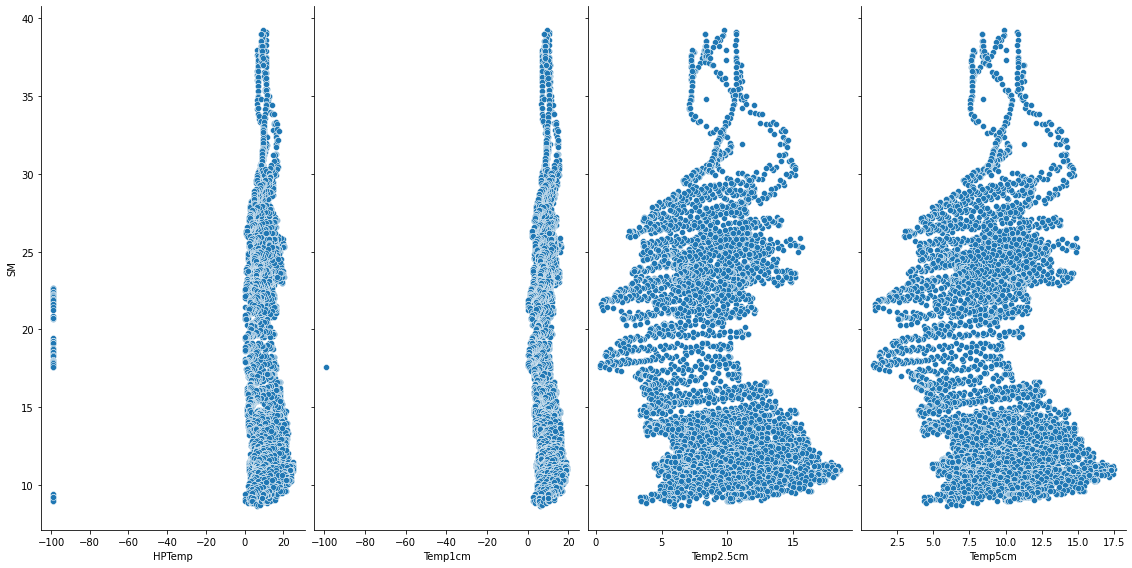

In [20]:
sns.pairplot(dataset,x_vars=['HPTemp','Temp1cm','Temp2.5cm','Temp5cm'],y_vars='SM',height=8,aspect=0.5)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6624 entries, 0 to 6623
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HPTemp     6624 non-null   float64
 1   Temp1cm    6624 non-null   float64
 2   Temp2.5cm  6624 non-null   float64
 3   Temp5cm    6624 non-null   float64
 4   SM         6624 non-null   float64
 5   hr         6624 non-null   object 
 6   min        6624 non-null   object 
 7   month      6624 non-null   object 
dtypes: float64(5), object(3)
memory usage: 414.1+ KB


In [22]:
dataset.shape

(6624, 8)

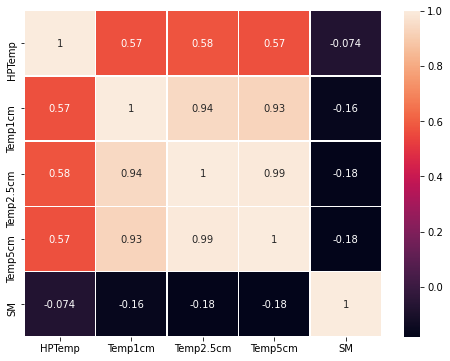

In [23]:
plt.subplots(figsize=(8, 6))
sns.heatmap(dataset.corr(),annot=True,linewidths=.5);

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = dataset.drop(labels = ['SM', 'hr', 'min','month','Temp2.5cm', 'Temp1cm'],axis = 1)
X.shape

(6624, 2)

In [25]:
y = dataset['SM']
X = scaler.fit_transform(X)
print(X)

[[-0.18578096 -0.35620143]
 [-0.21260266 -0.43442445]
 [-0.23271893 -0.50924646]
 ...
 [ 0.08914145  0.57227177]
 [ 0.08243603  0.51785576]
 [ 0.08243603  0.46343975]]


In [26]:
print(y)

0       16.92
1       16.82
2       16.49
3       16.75
4       16.76
        ...  
6619     9.44
6620     9.44
6621     9.44
6622     9.19
6623     9.19
Name: SM, Length: 6624, dtype: float64


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [28]:
from sklearn.ensemble import RandomForestRegressor
no_tree = [1000,5000,10000]
max_depth_array = [20,64,100]
for i in range(len(no_tree)):
    for j in max_depth_array:
        regressor = RandomForestRegressor(n_estimators = no_tree[i], max_depth=j, random_state = 0)
        regressor.fit(X_train, y_train)
        accuracy = regressor.score(X_test,y_test)
        print(accuracy*100,'%')

79.69836265860692 %
83.38646578604344 %
83.38646578604344 %
79.72350892544586 %
83.4752009331113 %
83.4752009331113 %
79.69689680348748 %
83.43623480881614 %
83.43623480881614 %


In [29]:
regressor = RandomForestRegressor(n_estimators = 5000, max_depth=64, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=64, n_estimators=5000, random_state=0)

In [30]:
y_pred = regressor.predict(X_test)
print(y_pred)

[15.94386063 11.73549086 24.14256263 ... 22.429178   19.573266
 31.82736656]


In [31]:
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

83.4752009331113 %


In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8347520093311129

In [33]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()
l.fit(X_train,y_train)

LinearRegression()

In [34]:
accuracy = l.score(X_test,y_test)
print(accuracy*100,'%')

4.134332389826478 %


In [35]:
y_predict = l.predict(X_test)
print(y_predict)

[17.50462581 18.01153342 17.12079206 ... 19.0740728  18.32727235
 18.06064919]


In [36]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.04134332389826478

In [37]:
dataset2 = pd.read_csv('soilmoisture2.csv')

In [38]:
dataset2

,DATE-TIME,Temp 4cm,Temp 15cm,Temp 45cm,Temp 75cm,SM 0-8cm,SM 0-30cm,SM 30-60cm,SM 60-90cm,Suction 4cm,Suction 15cm,Suction 45cm,Suction 75cm
0,NaN,(C),(C),(C),(C),(%vol),(%vol),(%vol),(%vol),(kPa),(kPa),(kPa),(kPa)
1,01-12-2008 00:00,18.0,-99.0,20.7,-99.0,10.45,19.98,18.16,21.84,600,85,72,600
2,01-12-2008 00:30,17.7,-99.0,20.6,-99.0,10.47,20.07,18.18,21.92,600,85,72,600
3,01-12-2008 01:00,17.7,-99.0,20.8,-99.0,10.46,20.02,18.15,21.82,600,85,72,600
4,01-12-2008 01:30,17.1,-99.0,20.4,-99.0,10.49,20.02,18.21,21.80,600,85,72,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4316,28-02-2009 21:30,25.8,26.7,24.4,-99.0,4.84,13.16,14.28,21.45,600,600,600,600
4317,28-02-2009 22:00,25.3,26.4,24.4,-99.0,4.85,13.19,14.28,21.44,600,600,600,600
4318,28-02-2009 22:30,24.9,26.1,24.4,-99.0,4.85,13.21,14.28,21.45,600,600,600,600
4319,28-02-2009 23:00,24.4,26.1,24.4,-99.0,4.86,13.21,14.29,21.45,600,600,600,600


In [39]:
dataset2.dropna()

,DATE-TIME,Temp 4cm,Temp 15cm,Temp 45cm,Temp 75cm,SM 0-8cm,SM 0-30cm,SM 30-60cm,SM 60-90cm,Suction 4cm,Suction 15cm,Suction 45cm,Suction 75cm
1,01-12-2008 00:00,18.0,-99.0,20.7,-99.0,10.45,19.98,18.16,21.84,600,85,72,600
2,01-12-2008 00:30,17.7,-99.0,20.6,-99.0,10.47,20.07,18.18,21.92,600,85,72,600
3,01-12-2008 01:00,17.7,-99.0,20.8,-99.0,10.46,20.02,18.15,21.82,600,85,72,600
4,01-12-2008 01:30,17.1,-99.0,20.4,-99.0,10.49,20.02,18.21,21.80,600,85,72,600
5,01-12-2008 02:00,17.1,-99.0,20.5,-99.0,10.48,19.99,18.20,21.73,600,85,72,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4316,28-02-2009 21:30,25.8,26.7,24.4,-99.0,4.84,13.16,14.28,21.45,600,600,600,600
4317,28-02-2009 22:00,25.3,26.4,24.4,-99.0,4.85,13.19,14.28,21.44,600,600,600,600
4318,28-02-2009 22:30,24.9,26.1,24.4,-99.0,4.85,13.21,14.28,21.45,600,600,600,600
4319,28-02-2009 23:00,24.4,26.1,24.4,-99.0,4.86,13.21,14.29,21.45,600,600,600,600


In [40]:
dataset22 = dataset2.set_axis(['Date_time','Temp4cm', 'Temp15cm', 'Temp45cm', 'Temp75cm', 'SM8','SM30','SM60','SM90','suc4','suc15','suc45','suc75'], axis=1, inplace=False)

In [41]:
dataset22

,Date_time,Temp4cm,Temp15cm,Temp45cm,Temp75cm,SM8,SM30,SM60,SM90,suc4,suc15,suc45,suc75
0,NaN,(C),(C),(C),(C),(%vol),(%vol),(%vol),(%vol),(kPa),(kPa),(kPa),(kPa)
1,01-12-2008 00:00,18.0,-99.0,20.7,-99.0,10.45,19.98,18.16,21.84,600,85,72,600
2,01-12-2008 00:30,17.7,-99.0,20.6,-99.0,10.47,20.07,18.18,21.92,600,85,72,600
3,01-12-2008 01:00,17.7,-99.0,20.8,-99.0,10.46,20.02,18.15,21.82,600,85,72,600
4,01-12-2008 01:30,17.1,-99.0,20.4,-99.0,10.49,20.02,18.21,21.80,600,85,72,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4316,28-02-2009 21:30,25.8,26.7,24.4,-99.0,4.84,13.16,14.28,21.45,600,600,600,600
4317,28-02-2009 22:00,25.3,26.4,24.4,-99.0,4.85,13.19,14.28,21.44,600,600,600,600
4318,28-02-2009 22:30,24.9,26.1,24.4,-99.0,4.85,13.21,14.28,21.45,600,600,600,600
4319,28-02-2009 23:00,24.4,26.1,24.4,-99.0,4.86,13.21,14.29,21.45,600,600,600,600


In [42]:
dataset22

,Date_time,Temp4cm,Temp15cm,Temp45cm,Temp75cm,SM8,SM30,SM60,SM90,suc4,suc15,suc45,suc75
0,NaN,(C),(C),(C),(C),(%vol),(%vol),(%vol),(%vol),(kPa),(kPa),(kPa),(kPa)
1,01-12-2008 00:00,18.0,-99.0,20.7,-99.0,10.45,19.98,18.16,21.84,600,85,72,600
2,01-12-2008 00:30,17.7,-99.0,20.6,-99.0,10.47,20.07,18.18,21.92,600,85,72,600
3,01-12-2008 01:00,17.7,-99.0,20.8,-99.0,10.46,20.02,18.15,21.82,600,85,72,600
4,01-12-2008 01:30,17.1,-99.0,20.4,-99.0,10.49,20.02,18.21,21.80,600,85,72,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4316,28-02-2009 21:30,25.8,26.7,24.4,-99.0,4.84,13.16,14.28,21.45,600,600,600,600
4317,28-02-2009 22:00,25.3,26.4,24.4,-99.0,4.85,13.19,14.28,21.44,600,600,600,600
4318,28-02-2009 22:30,24.9,26.1,24.4,-99.0,4.85,13.21,14.28,21.45,600,600,600,600
4319,28-02-2009 23:00,24.4,26.1,24.4,-99.0,4.86,13.21,14.29,21.45,600,600,600,600


In [43]:
dataset22.drop('Date_time',axis=1,inplace=True)

In [44]:
dataset23 = dataset22

In [45]:
print(dataset23.columns.values)

['Temp4cm' 'Temp15cm' 'Temp45cm' 'Temp75cm' 'SM8' 'SM30' 'SM60' 'SM90'
 'suc4' 'suc15' 'suc45' 'suc75']


In [46]:
dataset23

,Temp4cm,Temp15cm,Temp45cm,Temp75cm,SM8,SM30,SM60,SM90,suc4,suc15,suc45,suc75
0,(C),(C),(C),(C),(%vol),(%vol),(%vol),(%vol),(kPa),(kPa),(kPa),(kPa)
1,18.0,-99.0,20.7,-99.0,10.45,19.98,18.16,21.84,600,85,72,600
2,17.7,-99.0,20.6,-99.0,10.47,20.07,18.18,21.92,600,85,72,600
3,17.7,-99.0,20.8,-99.0,10.46,20.02,18.15,21.82,600,85,72,600
4,17.1,-99.0,20.4,-99.0,10.49,20.02,18.21,21.80,600,85,72,600
...,...,...,...,...,...,...,...,...,...,...,...,...
4316,25.8,26.7,24.4,-99.0,4.84,13.16,14.28,21.45,600,600,600,600
4317,25.3,26.4,24.4,-99.0,4.85,13.19,14.28,21.44,600,600,600,600
4318,24.9,26.1,24.4,-99.0,4.85,13.21,14.28,21.45,600,600,600,600
4319,24.4,26.1,24.4,-99.0,4.86,13.21,14.29,21.45,600,600,600,600


In [47]:
dataset24 = dataset23.iloc[1:,:]

In [48]:
dataset24

,Temp4cm,Temp15cm,Temp45cm,Temp75cm,SM8,SM30,SM60,SM90,suc4,suc15,suc45,suc75
1,18.0,-99.0,20.7,-99.0,10.45,19.98,18.16,21.84,600,85,72,600
2,17.7,-99.0,20.6,-99.0,10.47,20.07,18.18,21.92,600,85,72,600
3,17.7,-99.0,20.8,-99.0,10.46,20.02,18.15,21.82,600,85,72,600
4,17.1,-99.0,20.4,-99.0,10.49,20.02,18.21,21.80,600,85,72,600
5,17.1,-99.0,20.5,-99.0,10.48,19.99,18.20,21.73,600,85,72,600
...,...,...,...,...,...,...,...,...,...,...,...,...
4316,25.8,26.7,24.4,-99.0,4.84,13.16,14.28,21.45,600,600,600,600
4317,25.3,26.4,24.4,-99.0,4.85,13.19,14.28,21.44,600,600,600,600
4318,24.9,26.1,24.4,-99.0,4.85,13.21,14.28,21.45,600,600,600,600
4319,24.4,26.1,24.4,-99.0,4.86,13.21,14.29,21.45,600,600,600,600


In [49]:
y2 = dataset24.iloc[:,5:9]

In [50]:
y2

,SM30,SM60,SM90,suc4
1,19.98,18.16,21.84,600
2,20.07,18.18,21.92,600
3,20.02,18.15,21.82,600
4,20.02,18.21,21.80,600
5,19.99,18.20,21.73,600
...,...,...,...,...
4316,13.16,14.28,21.45,600
4317,13.19,14.28,21.44,600
4318,13.21,14.28,21.45,600
4319,13.21,14.29,21.45,600


In [51]:
dataset24.drop(['SM8','SM30','SM60','SM90'],axis=1,inplace=True)

c:\users\avinash gupta\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [52]:
X2 = dataset24

In [53]:
X2

,Temp4cm,Temp15cm,Temp45cm,Temp75cm,suc4,suc15,suc45,suc75
1,18.0,-99.0,20.7,-99.0,600,85,72,600
2,17.7,-99.0,20.6,-99.0,600,85,72,600
3,17.7,-99.0,20.8,-99.0,600,85,72,600
4,17.1,-99.0,20.4,-99.0,600,85,72,600
5,17.1,-99.0,20.5,-99.0,600,85,72,600
...,...,...,...,...,...,...,...,...
4316,25.8,26.7,24.4,-99.0,600,600,600,600
4317,25.3,26.4,24.4,-99.0,600,600,600,600
4318,24.9,26.1,24.4,-99.0,600,600,600,600
4319,24.4,26.1,24.4,-99.0,600,600,600,600


In [54]:
dataset24.isnull().sum()

Temp4cm     0
Temp15cm    0
Temp45cm    0
Temp75cm    0
suc4        0
suc15       0
suc45       0
suc75       0
dtype: int64

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

In [61]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.20, random_state = 0)

In [62]:
from sklearn.linear_model import LinearRegression
l2 = LinearRegression()
l2.fit(X2_train,y2_train)

LinearRegression()

In [63]:
accuracy2 = l2.score(X2_test,y2_test)
print(accuracy*100,'%')

83.46518093895071 %


In [64]:
from sklearn.ensemble import RandomForestRegressor
no_tree = [1000,5000,7000]
max_depth_array = [20,64,100]
for i in range(len(no_tree)):
    for j in max_depth_array:
        regressor = RandomForestRegressor(n_estimators = no_tree[i], max_depth=j, random_state = 0)
        regressor.fit(X2_train, y2_train)
        accuracy = regressor.score(X2_test,y2_test)
        print(accuracy*100,'%')

98.09046784990525 %
98.09103495131647 %
98.09103495131647 %
98.10308648145632 %
98.10167493582772 %
98.10167493582772 %
98.1018456262661 %
98.10063047219975 %
98.10063047219975 %


In [ ]:
regressor = RandomForestRegressor(n_estimators = 7000, max_depth=20, random_state = 0)
regressor.fit(X2_train, y2_train)